<a href="https://colab.research.google.com/github/SahibJ56/realtime-face-emotion-analysis/blob/main/image_capture_(webcam)_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display,Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
!pip uninstall tensorflow tensorflow-gpu
!pip install tensorflow tensorflow-gpu

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.7 MB)


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript(''' //javascript started
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');

      video.style.display = 'block'; //block = box
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);

      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
image_file = take_photo()

In [ ]:
image_file

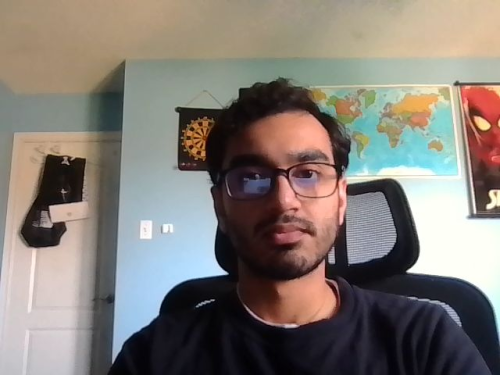

In [ ]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=500)
(h, w) = image.shape[:2]
cv2_imshow(image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2025-08-09 14:47:30--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2025-08-09 14:47:30 (38.5 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-08-09 14:47:30--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
print("loading model")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

loading model


In [ ]:
image = imutils.resize(image,width = 400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
net.setInput(blob)
detection = net.forward()

In [ ]:
for i in range(0, detection.shape[2]):
  confidence = detection[0, 0, i, 2]
  if confidence > 0.5:
    box = detection[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype('int')
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


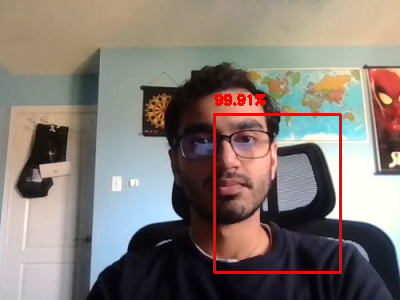

In [ ]:
cv2_imshow(image)

In [ ]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (271 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!apt-get install -y cmake
!pip install dlib
!pip install face_recognition
!pip install fer deepface opencv-python-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path = "photo.jpg"
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 1 face(s) in this photograph.


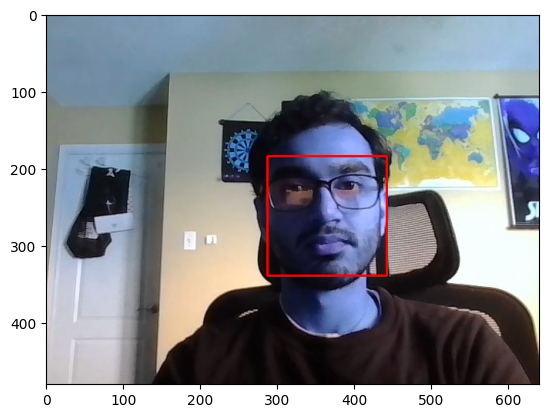

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for (top,right,bottom,left) in face_locations:
  cv2.rectangle(image_rgb,(left,top),(right,bottom),(255,0,0),2)
plt.imshow(image_rgb)
plt.show()

In [ ]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

import tensorflow as tf

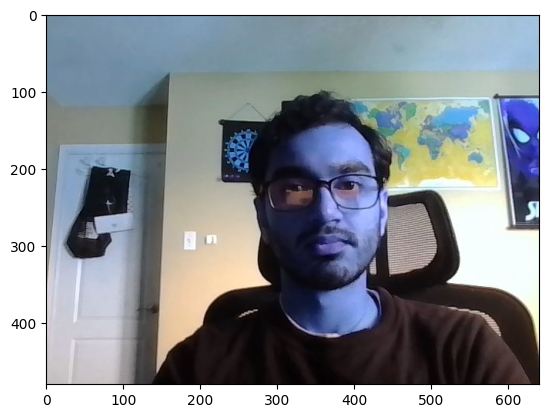

In [ ]:
image_path = "photo.jpg"
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [ ]:
print("Is GPU available?", tf.config.list_physical_devices('GPU'))

Is GPU available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
result = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False, detector_backend='opencv')

TypeError: analyze() got an unexpected keyword argument 'enable_gpu'

## Project Title: Real-time Face Detection and Emotion Analysis System

### Project Summary:
Developed and implemented a real-time computer vision system in Google Colab for robust face detection and emotion recognition from live webcam feeds, demonstrating expertise in deep learning model integration and front-end interaction for dynamic data capture.

### Key Technical Contributions:

*   **Architected** a seamless webcam integration using a custom JavaScript-Python interface within Google Colab, enabling real-time image acquisition and processing.
*   **Implemented** dual-approach face detection using:
    *   **OpenCV's Deep Neural Network (DNN) module** with a pre-trained Caffe model (`res10_300x300_ssd_iter_140000.caffemodel`) for high-accuracy bounding box generation and confidence scoring.
    *   The **`face_recognition` library** (built on `dlib`) for alternative robust facial feature localization.
*   **Integrated** the **`DeepFace` library** to perform advanced emotion analysis on detected faces, classifying sentiments (e.g., happiness, sadness, anger) directly from the visual input.
*   **Managed** comprehensive environment setup and dependency resolution, including `tensorflow`, `opencv-python-headless`, `dlib`, `face_recognition`, `DeepFace`, and `matplotlib`, ensuring functional stability within the Colab ecosystem.
*   **Optimized** computational resource allocation by explicitly configuring TensorFlow for CPU-only execution, enhancing portability and demonstrating adaptability across different hardware configurations.
*   **Utilized** `cv2_imshow` and `matplotlib.pyplot` for dynamic visualization of processed images, displaying detected faces with overlaid bounding boxes, confidence scores, and predicted emotions.

### Technologies & Libraries:
`Python`, `OpenCV (cv2)`, `imutils`, `tensorflow`, `numpy`, `dlib`, `face_recognition`, `DeepFace`, `matplotlib`, `Google Colab (JavaScript integration)`

## Project Title: Real-time Face Detection & Emotion Analysis

### Project Summary:
Developed and deployed a real-time computer vision system in Google Colab for live face detection and emotion recognition, integrating deep learning models and front-end interaction for dynamic data capture.

### Key Contributions:

*   **Engineered** a Python-JavaScript interface for real-time webcam image acquisition in Google Colab.
*   **Implemented** dual-approach face detection: OpenCV's DNN (Caffe model) and `face_recognition` (dlib-based) for robust bounding box generation.
*   **Integrated** `DeepFace` library for advanced emotion analysis, classifying sentiments (e.g., happiness, sadness) from facial expressions.
*   **Managed** comprehensive dependency resolution and optimized TensorFlow for CPU-only execution, enhancing system portability.
*   **Visualized** real-time results using `cv2_imshow` and `matplotlib.pyplot`, displaying detected faces, confidence scores, and emotional states.

### Core Technologies:
`Python`, `OpenCV`, `TensorFlow`, `dlib`, `face_recognition`, `DeepFace`, `matplotlib`, `Google Colab (JS Integration)`